In [1]:
height = 14463  # 57 —— 纵向57个
weight = 24064  # 94 —— 横向94个

In [5]:
height / 256

56.49609375

In [6]:
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib                 # 文件保存为png + 文件读取为png
from collections import Counter  # 数组独特元素统计
import scipy

In [37]:
all_image_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\大图分割后的png\*' )
all_image_path = sorted(all_image_path, key = lambda x:int(x.split('\\')[-1].split('.')[0].split('_')[-1]) )
len(all_image_path)

5358

In [94]:
# 一张图相当于：10 x 10 = 100个子图拼成！（且有顺序）
row_total = 5  # 每行取10个元素
col_total = 5  # 每列取10个元素

image_select = [] 

# 获取地址：
for x in range(col_total):
    tmp = all_image_path[ 40 + x*94 : 40 + x*94 + row_total ]  # 一行一行取
    image_select.append(tmp)

In [95]:
len(image_select), len( image_select[0] )

(5, 5)

In [96]:
# 嵌套列表拆开：排列顺序刚好从小到大（顺序排列）！
image_select_path = sum( image_select, [] )
total = len(image_select_path)

In [97]:
total

25

In [98]:
# 读取图片：
def read_image(image_select_path):
    all_image = []
    for x in range( total ):
        img = tf.io.read_file( image_select_path[x] )
        img = tf.image.decode_png(img, channels = 3)
        img = img.numpy()
        all_image.append( img )
    return all_image

In [99]:
# 图像合并函数：
def recoverimg(all_image):
    img_col = []
    for x in range( col_total ):
        tmp = np.concatenate( all_image[x*row_total:(x+1)*row_total], axis = 1 )
        img_col.append(tmp)
    img_recover = np.concatenate(img_col, axis = 0)
    return img_recover

In [100]:
# 合并后的图像保存：
save_path = 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/测试/'
def saveimg(img_recover):
    matplotlib.image.imsave( save_path + 'recover_{}_40.png'.format(row_total * col_total), img_recover )

In [101]:
all_image = read_image(image_select_path)
img_recover = recoverimg(all_image)

In [102]:
img_recover.shape

(1280, 1280, 3)

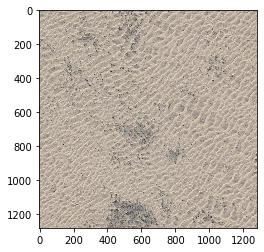

In [103]:
plt.imshow(img_recover)

In [104]:
saveimg(img_recover)